In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '/Users/andrew/Documents/python/pygplates_rev28_python37_MacOS64')
import pygplates

from collections import defaultdict

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Polygon
from shapely.geometry import LineString
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.cm as cm
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
#set directories
datadir = '/Users/andrew/Documents/Data/plate_boundary_analysis/'
platedir = '/Users/andrew/Documents/GitHub/EarthBytePlateMotionModel-ARCHIVE/Muller++_2015_AREPS_CORRECTED/'
savedir = '/Users/andrew/Documents/Data/Gernon_shallow_ridges/'
# import previously made file in 'extract velocities'

rotfile = '%sGlobal_EarthByte_230-0Ma_GK07_AREPS.rot' % platedir
COBs = '%sAgeGridInput/Global_EarthByte_230-0Ma_GK07_AREPS_COB_Terranes.gpml' % platedir
coastlines = '%sGlobal_EarthByte_230-0Ma_GK07_AREPS_Coastlines.gpml' % platedir
input_topology_filename = ['%sGlobal_EarthByte_230-0Ma_GK07_AREPS_PlateBoundaries.gpml' % platedir,
                           '%sGlobal_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpml' % platedir]

rotation_model = pygplates.RotationModel(rotfile)



In [3]:
#define our geographical regions
files = ['Afr-Ant','Afr-Mad', 'Aus-Ant', 'Aus-Mol', 'Central_Atlantic', 
         'Equatorial_Atlantic', 'Iberian_Atlantic', 'Ind-Aus-Ant','Ind-Mad', 
         'Labrador_sea', 'North_Atlantic', 'Southern_Atlantic']
#files = ['Afr-Ant','Afr-Mad']

In [4]:
#load data
df = pd.read_csv('%sresults/raw_shallow_spreading_segments_%s.csv' % (savedir, files[1]),  index_col=None)

In [8]:
for file in files:#load data
    df = pd.read_csv('%sresults/raw_shallow_spreading_segments_%s.csv' % (savedir, file),  index_col=None)
    print(file, df['Time_Ma'].min())

Afr-Ant 124
Afr-Mad 124
Aus-Ant 10
Aus-Mol 125
Central_Atlantic 150
Equatorial_Atlantic 90
Iberian_Atlantic 110
Ind-Aus-Ant 101
Ind-Mad 59
Labrador_sea 33
North_Atlantic 25
Southern_Atlantic 102


In [7]:
df

MeanPointLon  MeanPointLat  StartPointLat  StartPointLon  EndPointLat  \
0       -9.366248    -10.503136      -9.840435      -9.732185   -11.165838   
1       -8.953081    -11.643360     -11.165838      -9.000311   -12.120883   
2       -9.036526    -12.642962     -12.120883      -8.905851   -13.165041   
3      -10.017941    -14.191536     -13.165041      -9.167201   -15.218030   
4      -11.310464    -16.172201     -15.218030     -10.868682   -17.126372   
..            ...           ...            ...            ...          ...   
644    -23.615121    -43.754349     -42.829316     -22.965075   -44.679383   
645    -24.407401    -44.866380     -44.679383     -24.265167   -45.053377   
646    -24.718690    -47.504086     -45.053377     -24.549634   -49.954795   
647    -25.062424    -51.623891     -49.954795     -24.887746   -53.292987   
648    -25.250454    -53.862906     -53.292987     -25.237102   -54.432825   

     EndPointLon   Length_km  LeftPlate  RightPlate  PlateID  Time_Ma  \
0      -9.000311  167.698501        701         201        0      102   
1      -8.905851  106.693441        701         201        0      102   
2      -9.167201  119.517707        701         201        0      102   
3     -10.868682  292.834674        701         201        0      102   
4     -11.752246  232.230253        701         201        0      102   
..           ...         ...        ...         ...      ...      ...   
644   -24.265167  230.694304        701         201        0      132   
645   -24.549634   47.244167        701         201        0      132   
646   -24.887746  545.603420        701         201        0      132   
647   -25.237102  371.971856        701         201        0      132   
648   -25.263806  126.756556        701         201        0      132   

     Plate_Velocity  
0          5.093876  
1          5.182217  
2          5.231481  
3          5.274272  
4          5.327602  
..              ...  
644        0.950534  
645        0.977512  
646        0.982884  
647        1.046144  
648        1.084940  

[649 rows x 12 columns]

/Users/andrew/miniconda3/envs/py377/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:762: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f9db3a2bfb0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/Users/andrew/miniconda3/envs/py377/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:762: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f9dc2966d70> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/Users/andrew/miniconda3/envs/py377/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:762: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f9dc0b626b0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/Users/andrew/miniconda3/envs/py377/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:762: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f9dbe8d4cb0> with the PlateCarree projection.
 

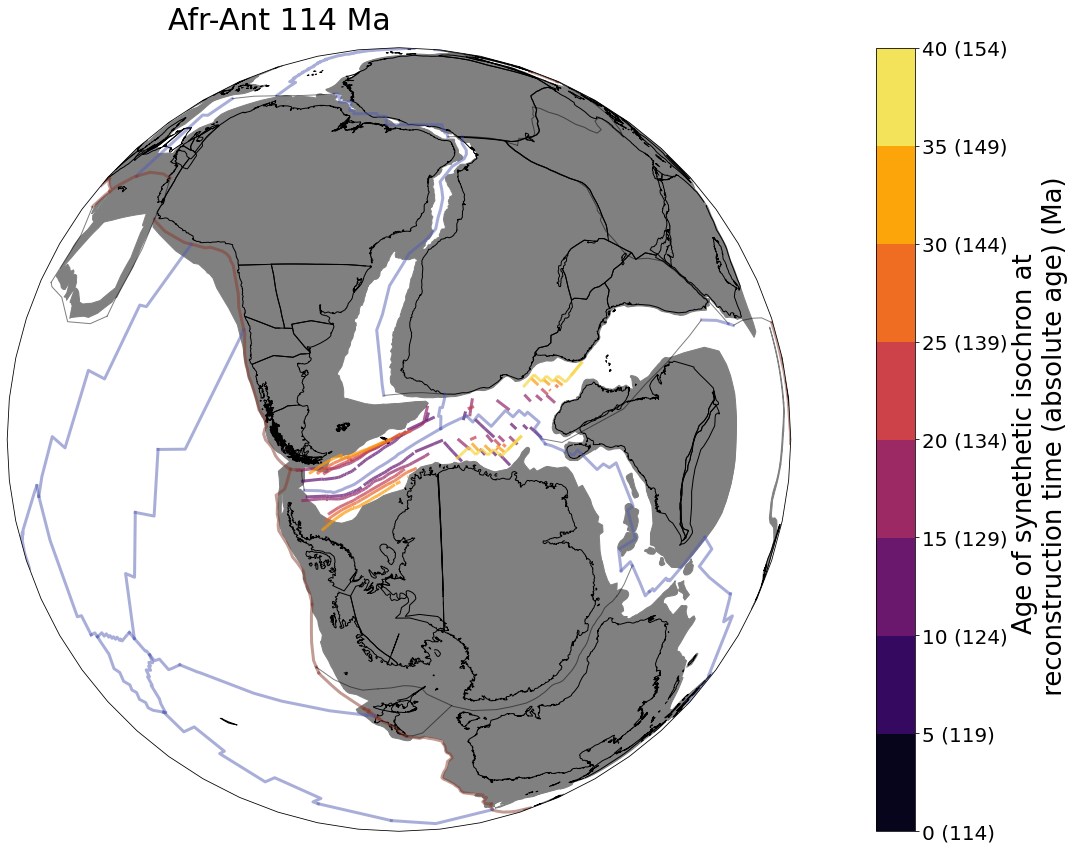

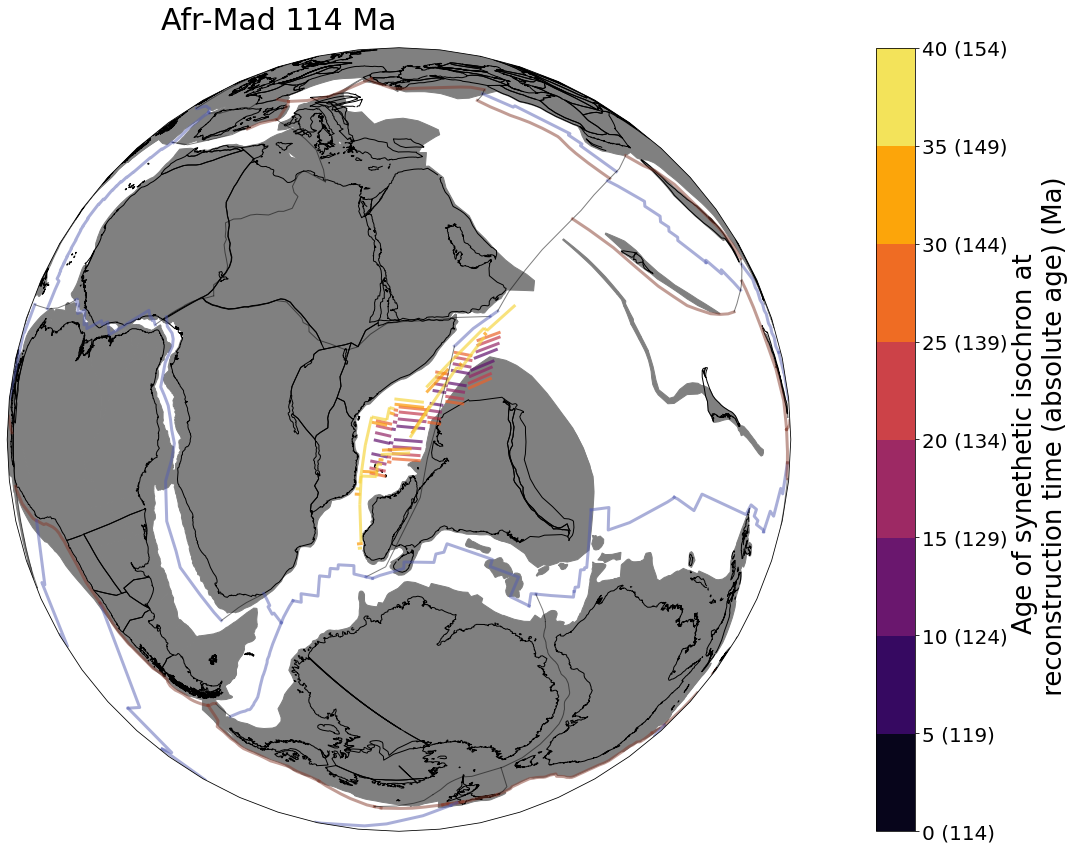

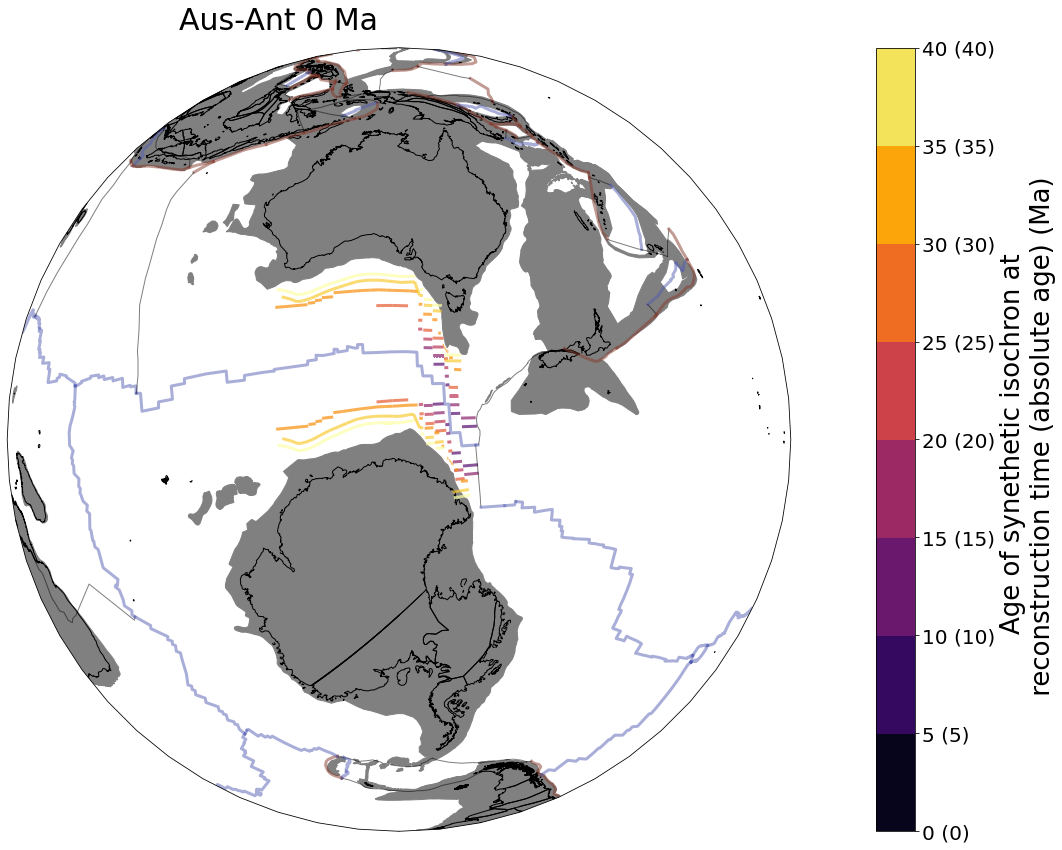

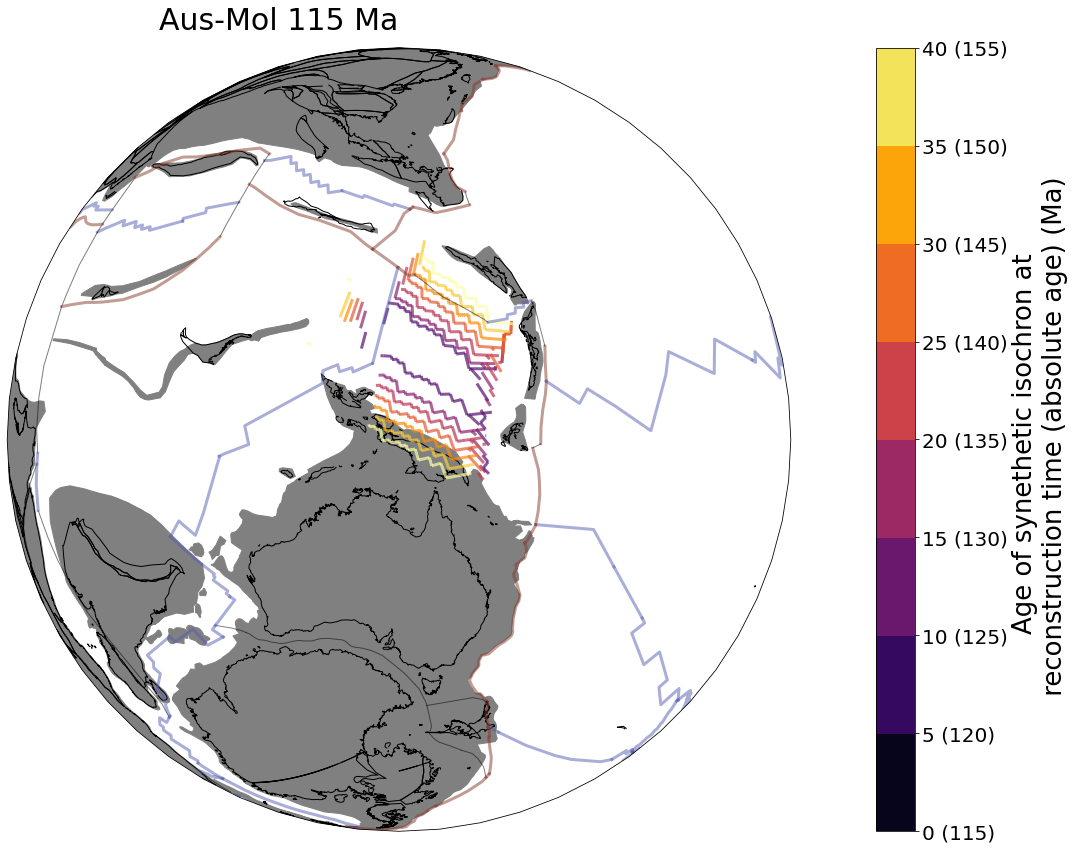

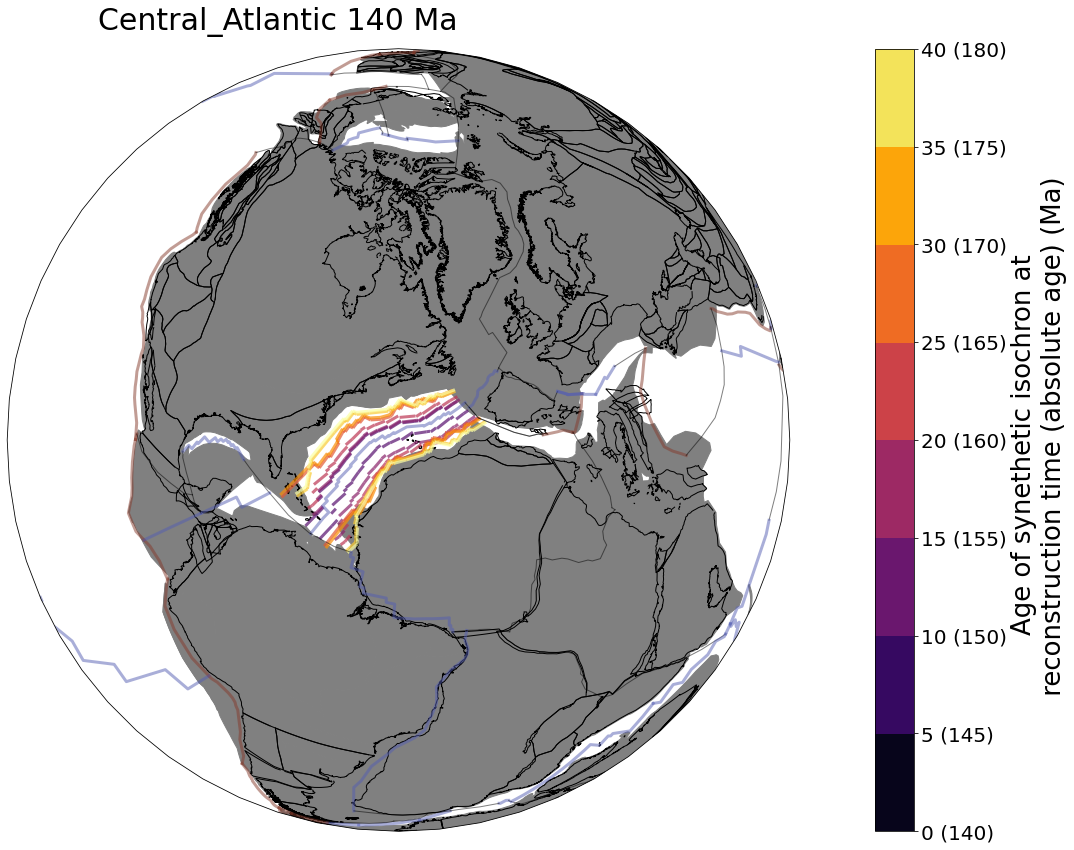

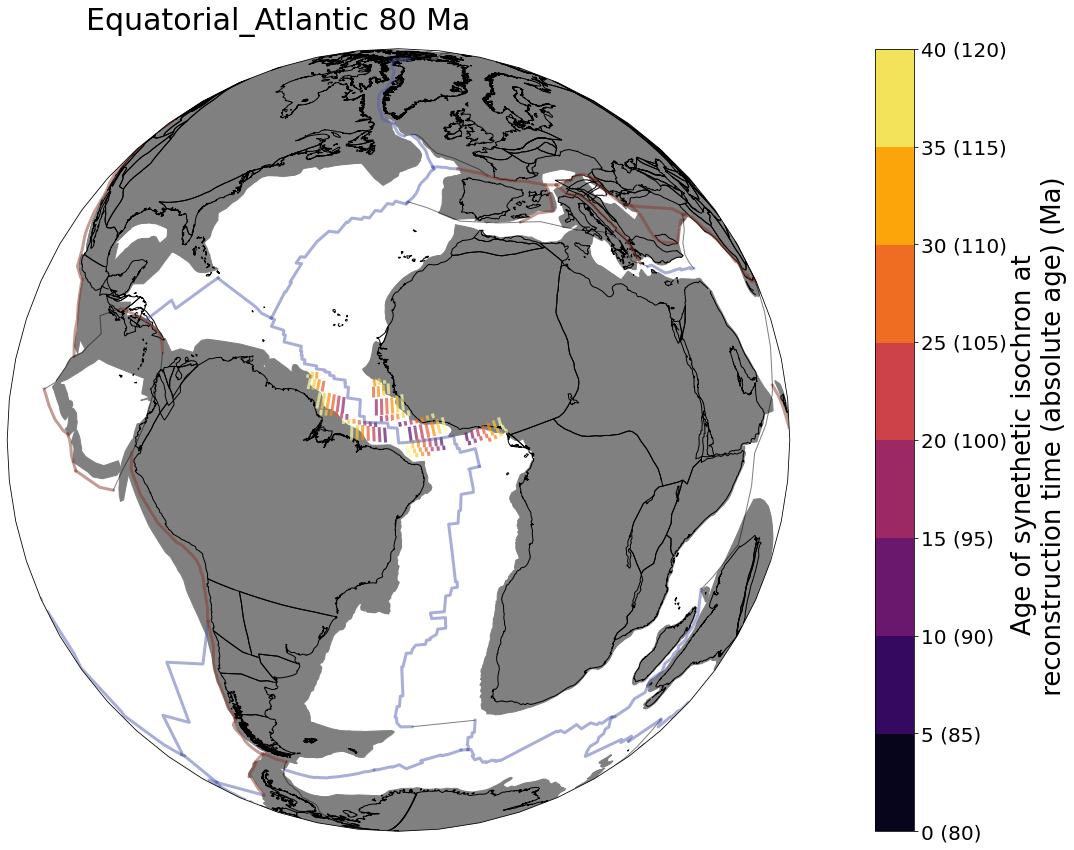

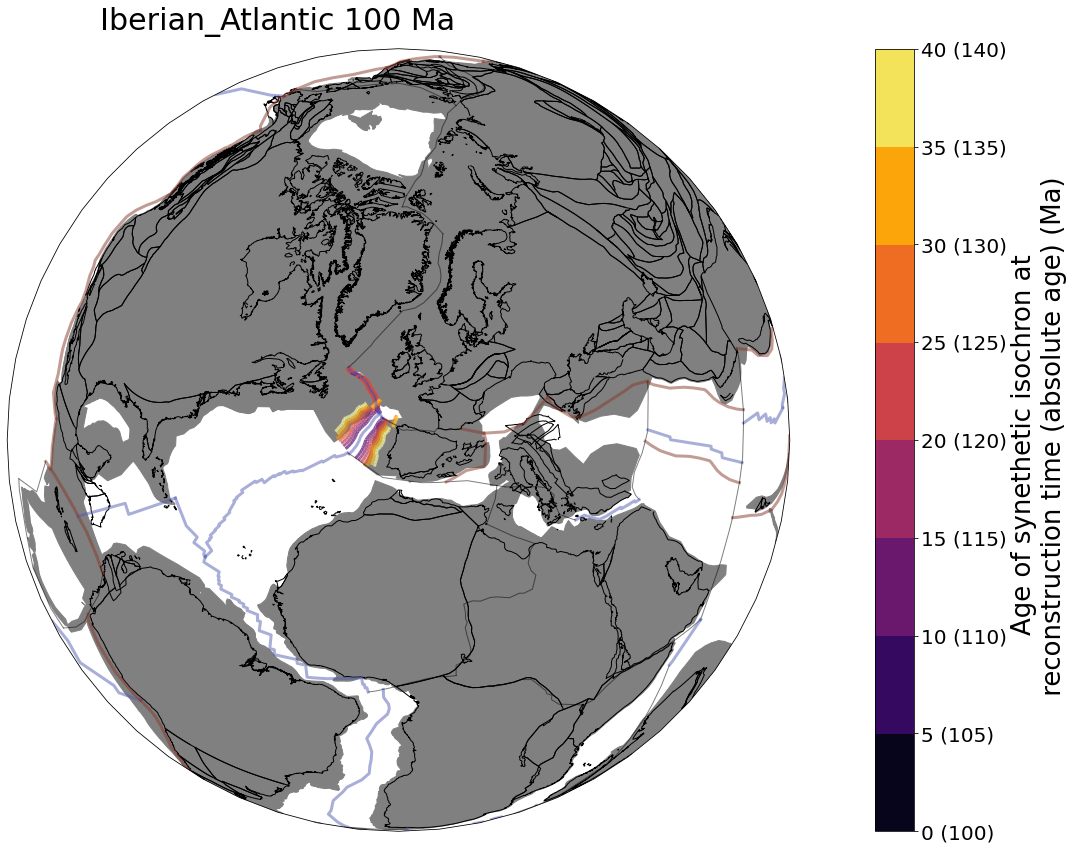

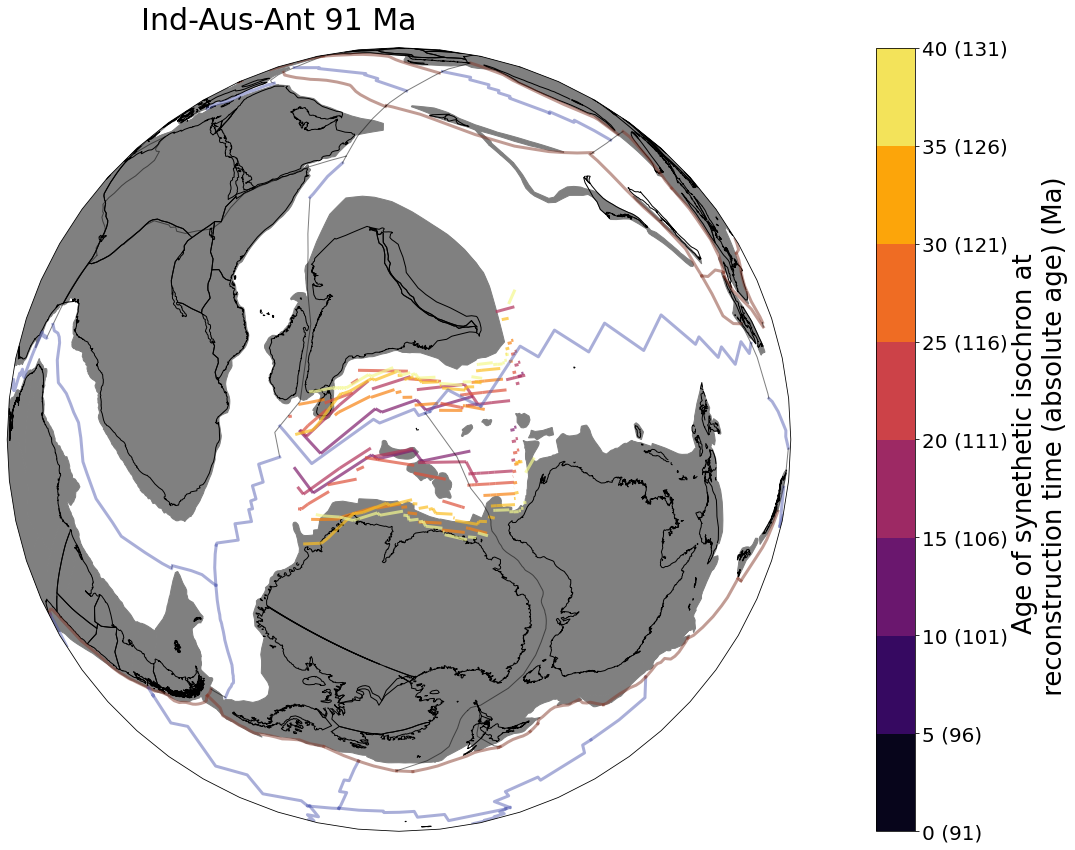

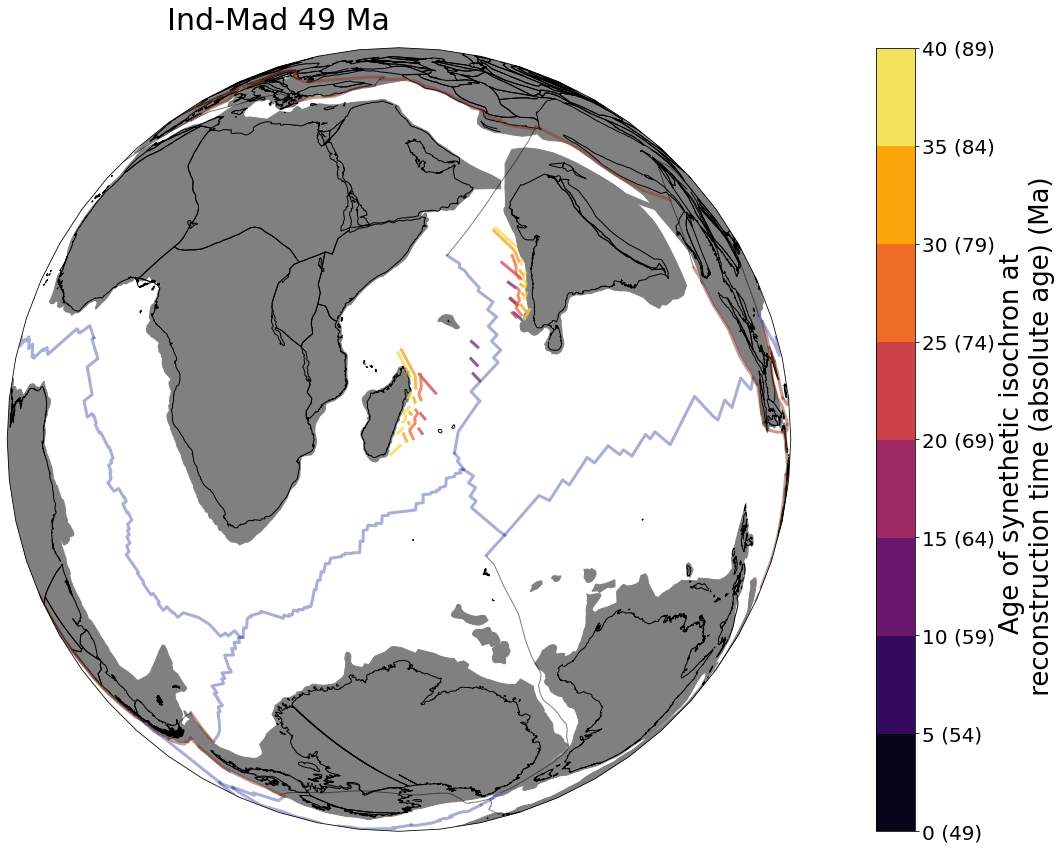

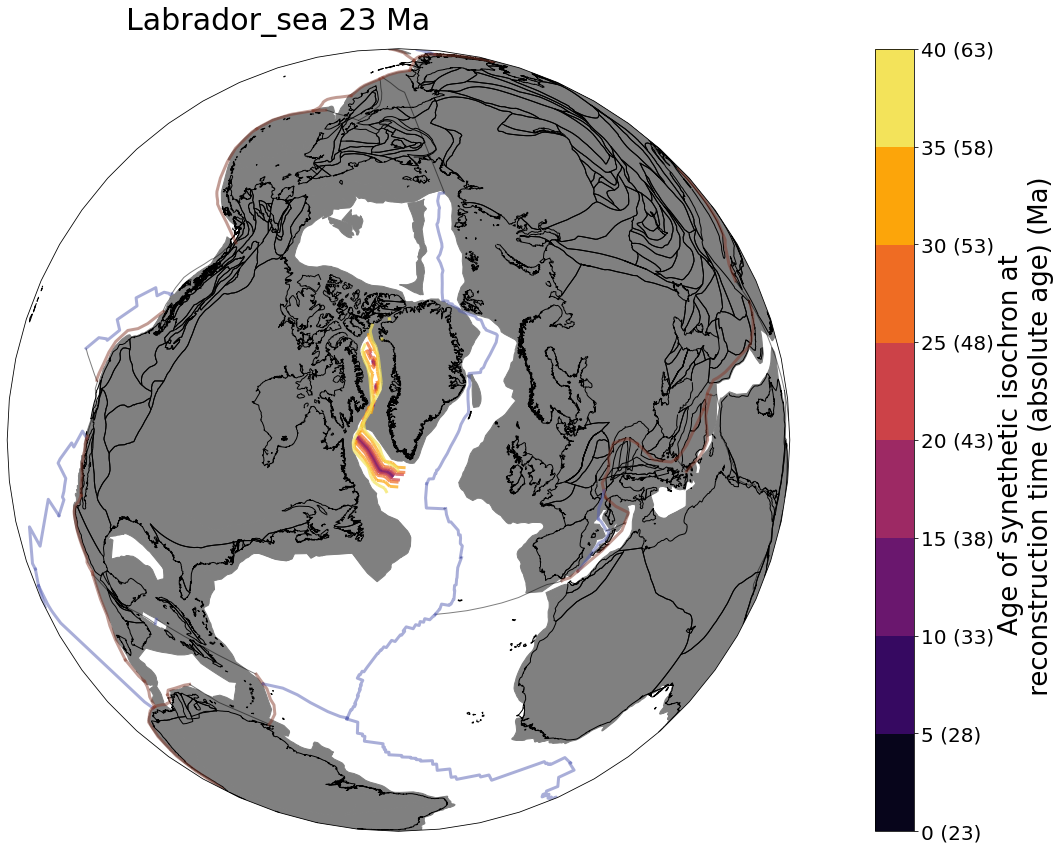

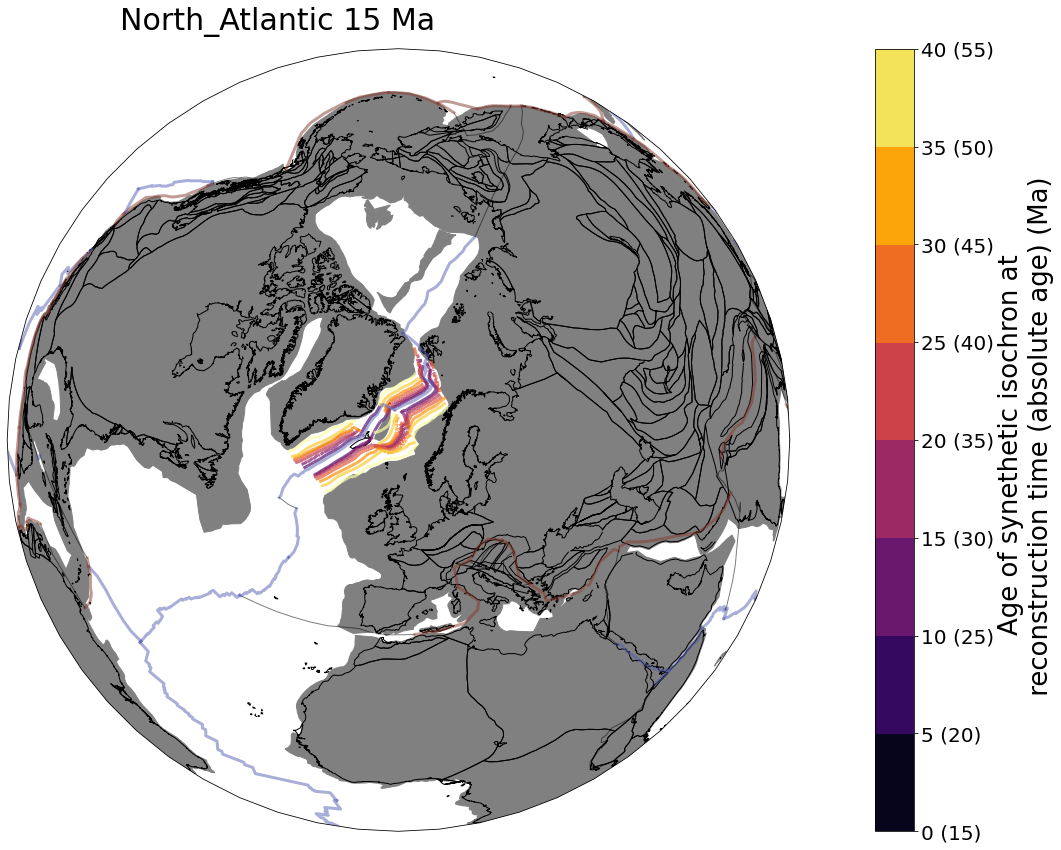

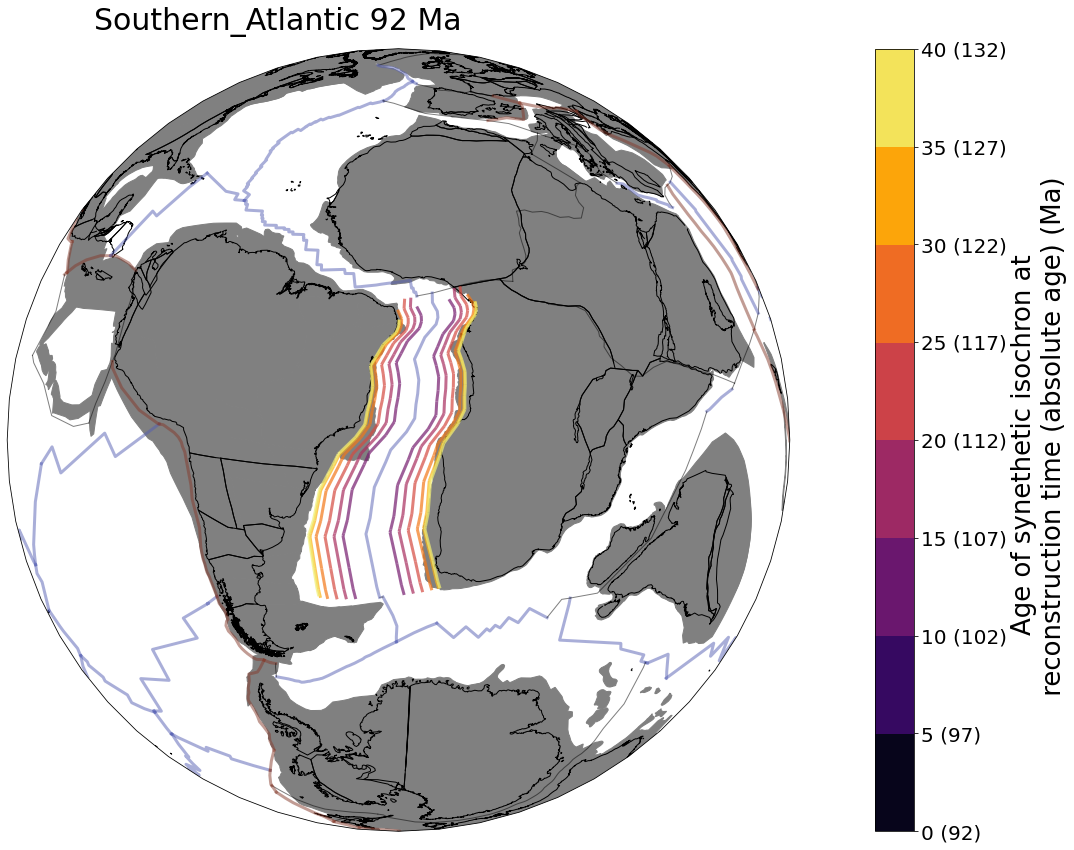

In [39]:
date_line_wrapper = pygplates.DateLineWrapper(0)

for file in files:#load data
    df = pd.read_csv('%sresults/raw_shallow_spreading_segments_%s.csv' % (savedir, file),  index_col=None)

    #plotting (but cartopy still broken?)
    data_crs = ccrs.Geodetic()
    poly_data_crs = ccrs.PlateCarree()
    cm = plt.get_cmap(name='inferno')
    colour_map = cm(np.linspace(0, 1, 41))

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24,12),
                           subplot_kw={'projection': ccrs.Orthographic(df['MeanPointLon'].mean(),
                                                                       df['MeanPointLat'].mean())})

    plot_time = np.max(df['Time_Ma'].min()-10, 0)
    
    reconstructed_coastlines = []
    reconstructed_COBs = []
    pygplates.reconstruct(COBs,rotation_model, reconstructed_COBs,int(plot_time))
    pygplates.reconstruct(coastlines,rotation_model,reconstructed_coastlines,int(plot_time))

    resolved_topologies = []
    shared_boundary_sections = []



    pygplates.resolve_topologies(input_topology_filename, rotation_model,
                             resolved_topologies,int(plot_time), shared_boundary_sections)
    
    for ind, row in df.iterrows():
        time = row[10]
        if time % 5 != 0:
            continue

        points = np.array([row[2], row[3], row[4], row[5]])
        point = np.array([row[1], row[0]])
        polyline = pygplates.PolylineOnSphere(zip(points[::2],points[1::2]))
        mid_point = pygplates.PointOnSphere(point)
        left_plate = row[7]
        right_plate = row[8]

        rotation_right = rotation_model.get_rotation(int(plot_time), int(right_plate), int(time))
        rotation_left = rotation_model.get_rotation(int(plot_time), int(left_plate), int(time))
        reconstructed_line_right = rotation_right * polyline
        reconstructed_line_left = rotation_left * polyline

        colour_time = int(time)- plot_time

        #right rotation
        lat_lon_array = reconstructed_line_right.get_points().to_lat_lon_array()
        lats = lat_lon_array[:,0]
        lons = lat_lon_array[:,1]

        line = LineString(zip(lons,lats))
        data = ax.add_geometries([line], crs=data_crs, color=colour_map[colour_time], alpha=0.7, lw=3)

        #left rotation
        lat_lon_array = reconstructed_line_left.get_points().to_lat_lon_array()
        lats = lat_lon_array[:,0]
        lons = lat_lon_array[:,1]

        line = LineString(zip(lons,lats))
        ax.add_geometries([line], crs=data_crs, color=colour_map[colour_time], alpha=0.7, lw=3)


    for polygon in reconstructed_coastlines:
        polygon_geom = pygplates.PolygonOnSphere(polygon.get_reconstructed_geometry())
        wrapped_polygons = date_line_wrapper.wrap(polygon_geom, 1)
        for wrapped_polygon in wrapped_polygons:
            wrapped_polygons_lat = []
            wrapped_polygons_lon = []
            for wrapped_polygon_point in wrapped_polygon.get_exterior_points():
                wrapped_polygons_lat.append(wrapped_polygon_point.get_latitude())
                wrapped_polygons_lon.append(wrapped_polygon_point.get_longitude())

            ax.plot(wrapped_polygons_lon, wrapped_polygons_lat, color='k',
                    linewidth=1 ,zorder=0, transform=data_crs)
            
    for polygon in reconstructed_COBs:
        poly_geom = pygplates.PolygonOnSphere(polygon.get_reconstructed_geometry())
        wrapped_polys = date_line_wrapper.wrap(poly_geom, 1)
        for wrapped_poly in wrapped_polys:
            wrapped_poly_lat = []
            wrapped_poly_lon = []
            for wrapped_poly_point in wrapped_poly.get_exterior_points():
                wrapped_poly_lat.append(wrapped_poly_point.get_latitude())
                wrapped_poly_lon.append(wrapped_poly_point.get_longitude())

            ax.fill(wrapped_poly_lon, wrapped_poly_lat, color='grey', 
                    alpha=1, linewidth=1 ,zorder=0, transform=poly_data_crs)

    for shared_boundary_section in shared_boundary_sections:
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
            for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
                tmp = shared_sub_segment.get_resolved_geometry()
                wrapped_polylines = date_line_wrapper.wrap(tmp)
                for wrapped_polyline in wrapped_polylines:
                    mor_wrapped_point_lat = []
                    mor_wrapped_point_lon = []
                    for wrapped_point in wrapped_polyline.get_points():
                        mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                        mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                    ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='#545eb3',
                            linewidth=3, alpha=0.5, zorder=2, transform=data_crs)

        elif shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_subduction_zone:
            for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
                tmp = shared_sub_segment.get_resolved_geometry()
                wrapped_polylines = date_line_wrapper.wrap(tmp)
                for wrapped_polyline in wrapped_polylines:
                    mor_wrapped_point_lat = []
                    mor_wrapped_point_lon = []
                    for wrapped_point in wrapped_polyline.get_points():
                        mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                        mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                    ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='#853a2b',
                            linewidth=3, alpha=0.5, zorder=2, transform=data_crs)                
        else:
            for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
                tmp = shared_sub_segment.get_resolved_geometry()
                wrapped_polylines = date_line_wrapper.wrap(tmp)
                for wrapped_polyline in wrapped_polylines:
                    mor_wrapped_point_lat = []
                    mor_wrapped_point_lon = []
                    for wrapped_point in wrapped_polyline.get_points():
                        mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                        mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                    ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='k',
                            linewidth=1, alpha=0.5, zorder=2, transform=data_crs)

    norm = mpl.colors.Normalize(vmin=0,vmax=41)
    cmap = plt.get_cmap('inferno',41)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, boundaries=np.arange(0,41,5))
    cbar_ticks = []
    for tick in cbar.ax.get_yticks():
        cbar_ticks.append(str(int(tick)) + ' (' + str(int(tick+plot_time)) +')')
    cbar.ax.set_yticklabels(cbar_ticks) 
    
    cbar.set_label('Age of synethetic isochron at \n reconstruction time (absolute age) (Ma)', fontsize=26)
    cbar.ax.tick_params(labelsize=20) 
    fig.suptitle(str(file) + ' ' + str(plot_time) + ' Ma', fontsize=30)
    ax.set_global()
    fig_name =str(file) + '_' + str(plot_time) + '_Ma' 
    plt.tight_layout()
    #plt.savefig('%s%s.pdf' % (savedir, fig_name))

In [33]:
cbar_ticks = []
for tick in cbar.ax.get_yticks():
    new_tick = str(int(tick)) + ' (' + str(int(tick+plot_time)) +')'

In [34]:
new_tick

'40 (154)'

In [28]:
import matplotlib as mpl
mpl.get_configdir()

'/Users/andrew/.matplotlib'